In [108]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [109]:
inputs = keras.Input(shape=(784,))

In [110]:
img_inputs = keras.Input(shape=(32, 32, 3))

In [111]:
inputs.shape

TensorShape([None, 784])

In [112]:
inputs.dtype

tf.float32

In [113]:
dense = layers.Dense(128, activation="relu", name="title")
x = dense(inputs)

In [114]:
dense = layers.Dense(128, activation="relu")
z = dense(inputs)

In [115]:
z = layers.Dense(128, activation="relu")(z)
t = layers.Dense(1000)(z)

In [116]:
t = layers.Dense(64, activation="relu")(t)
outputs = layers.Dense(1000)(t)

In [117]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [118]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_44 (Dense)            (None, 128)               100480    
                                                                 
 dense_45 (Dense)            (None, 128)               16512     
                                                                 
 dense_46 (Dense)            (None, 1000)              129000    
                                                                 
 dense_47 (Dense)            (None, 64)                64064     
                                                                 
 dense_48 (Dense)            (None, 1000)              65000     
                                                                 
Total params: 375,056
Trainable params: 375,056
Non-tra

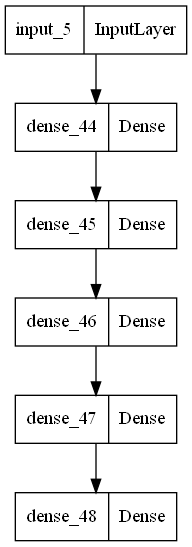

In [119]:
keras.utils.plot_model(model, "my_first_model.png" )

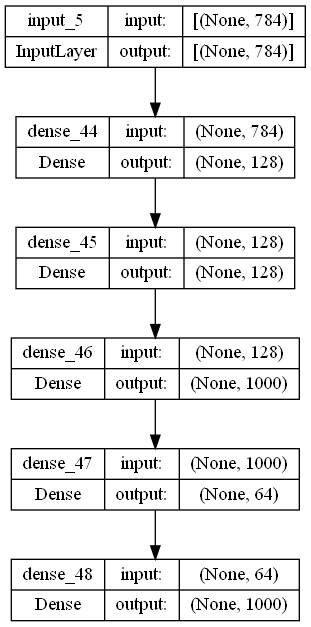

In [120]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [121]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 [==============================] - 6s 7ms/step - loss: 0.3744 - accuracy: 0.8892 - val_loss: 0.1873 - val_accuracy: 0.9448
Epoch 2/2
750/750 [==============================] - 5s 7ms/step - loss: 0.1322 - accuracy: 0.9609 - val_loss: 0.1262 - val_accuracy: 0.9623
313/313 - 1s - loss: 0.1397 - accuracy: 0.9574 - 858ms/epoch - 3ms/step
Test loss: 0.1397249549627304
Test accuracy: 0.9574000239372253


In [122]:
model.save("path_to_my_model")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_to_my_model")

INFO:tensorflow:Assets written to: path_to_my_model\assets


In [123]:
# num_tags = 12  # Number of unique issue tags
# num_words = 10000  # Size of vocabulary obtained when preprocessing text data
# num_departments = 4  # Number of departments for predictions

# title_input = keras.Input(
#     shape=(None,), name="title"
# )  # Variable-length sequence of ints
# body_input = keras.Input(shape=(None,), name="body")  # Variable-length sequence of ints
# tags_input = keras.Input(
#     shape=(num_tags,), name="tags"
# )  # Binary vectors of size `num_tags`

# # Embed each word in the title into a 64-dimensional vector
# title_features = layers.Embedding(num_words, 64)(title_input)
# # Embed each word in the text into a 64-dimensional vector
# body_features = layers.Embedding(num_words, 64)(body_input)

# # Reduce sequence of embedded words in the title into a single 128-dimensional vector
# title_features = layers.LSTM(128)(title_features)
# # Reduce sequence of embedded words in the body into a single 32-dimensional vector
# body_features = layers.LSTM(32)(body_features)

# # Merge all available features into a single large vector via concatenation
# x = layers.concatenate([title_features, body_features, tags_input])

# # Stick a logistic regression for priority prediction on top of the features
# priority_pred = layers.Dense(1, name="priority")(x)
# # Stick a department classifier on top of the features
# department_pred = layers.Dense(num_departments, name="department")(x)

# # Instantiate an end-to-end model predicting both priority and department
# model = keras.Model(
#     inputs=[title_input, body_input, tags_input],
#     outputs=[priority_pred, department_pred],
# )

Budowa mojego własnego modelu. 

In [124]:
from unicodedata import name


num_departments = 4  
inputs = keras.Input(128, name="title")

priority_pred = layers.Dense(264, name="priority")(inputs)
department_pred = layers.Dense(num_departments, name="department")(inputs)
y= layers.Dense(264, name = "property_2")(priority_pred)
x = layers.concatenate([y, department_pred])


model = keras.Model(
    inputs=inputs,
    outputs=x,
)

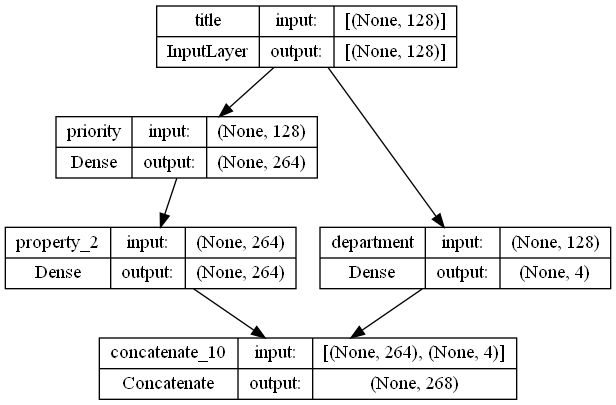

In [125]:
keras.utils.plot_model(model, "one_input_and_output_model_with_two_feaher.png", show_shapes=True)

In [126]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[
        keras.losses.BinaryCrossentropy(from_logits=True),
        keras.losses.CategoricalCrossentropy(from_logits=True),
    ],
    loss_weights=[1.0, 0.2],
)

In [127]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "priority": keras.losses.BinaryCrossentropy(from_logits=True),
        "department": keras.losses.CategoricalCrossentropy(from_logits=True),
    },
    loss_weights={"priority": 1.0, "department": 0.2},
)

Model z warstwami COVN2D

In [128]:


num_departments = 4  
inputs = keras.Input(128, name="title")

priority_pred = layers.Dense(264, name="priority")(inputs)
department_pred = layers.Dense(num_departments, name="department")(inputs)
y= layers.Dense(264, name = "property_2")(priority_pred)
x = layers.concatenate([y, department_pred])


model = keras.Model(
    inputs=inputs,
    outputs=x,
)

In [129]:
inputs = keras.Input(shape=(32, 32, 3), name="obrazek")
x = layers.Conv2D(64, 3, activation="relu", name="pierwsza_wartstwa_conv")(inputs)
y = layers.Conv2D(64, 3, activation="relu", name ="pierwsza_warstawa_2_conv")(inputs)
x = layers.concatenate([y, x])
output_1 = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same", name="druga_warstwa_conv")(output_1)
y=layers.Conv2D(64,3, activation="relu", padding = "same",  name="trzecia_warstwa_conv")(x)
output_2 = layers.MaxPooling2D(3)(y)

x = layers.Conv2D(64, 3, activation="relu", padding="same",name="czwarta_warstwa_conv")(output_2)
x = layers.Conv2D(64, 3, activation="relu", padding="same", name="piata_warstwa_conv" )(x)
x = layers.GlobalAveragePooling2D(name="GAP")(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()



Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 obrazek (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 pierwsza_warstawa_2_conv (Conv  (None, 30, 30, 64)  1792        ['obrazek[0][0]']                
 2D)                                                                                              
                                                                                                  
 pierwsza_wartstwa_conv (Conv2D  (None, 30, 30, 64)  1792        ['obrazek[0][0]']                
 )                                                                                                
                                                                                         

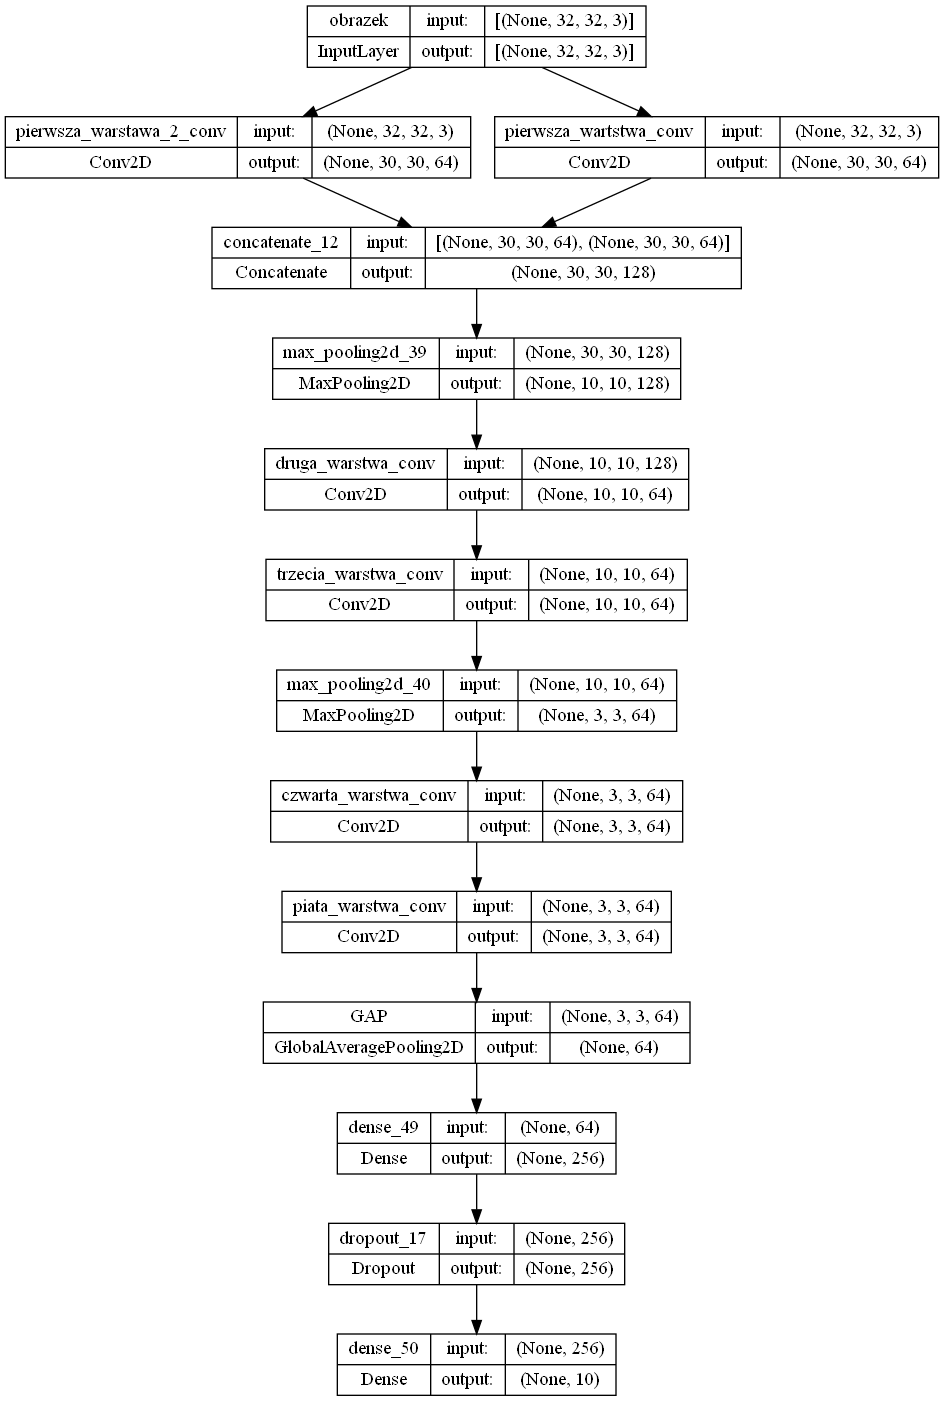

In [130]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

In [132]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)



model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)
# We restrict the data to the first 1000 samples so as to limit execution time
# on Colab. Try to train on the entire dataset until convergence!
history = model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=12, validation_split=0.2)

Epoch 1/12
13/13 [==============================] - 3s 109ms/step - loss: 2.3077 - accuracy: 0.1013 - val_loss: 2.3109 - val_accuracy: 0.0700
Epoch 2/12
13/13 [==============================] - 1s 84ms/step - loss: 2.2993 - accuracy: 0.1063 - val_loss: 2.2992 - val_accuracy: 0.0700
Epoch 3/12
13/13 [==============================] - 1s 84ms/step - loss: 2.2850 - accuracy: 0.1200 - val_loss: 2.3026 - val_accuracy: 0.1150
Epoch 4/12
13/13 [==============================] - 1s 85ms/step - loss: 2.2750 - accuracy: 0.1287 - val_loss: 2.2845 - val_accuracy: 0.1200
Epoch 5/12
13/13 [==============================] - 1s 84ms/step - loss: 2.2192 - accuracy: 0.1550 - val_loss: 2.5996 - val_accuracy: 0.1350
Epoch 6/12
13/13 [==============================] - 1s 86ms/step - loss: 2.1857 - accuracy: 0.1713 - val_loss: 2.1274 - val_accuracy: 0.1900
Epoch 7/12
13/13 [==============================] - 1s 86ms/step - loss: 2.1126 - accuracy: 0.2188 - val_loss: 2.0831 - val_accuracy: 0.2500
Epoch 8/12
1

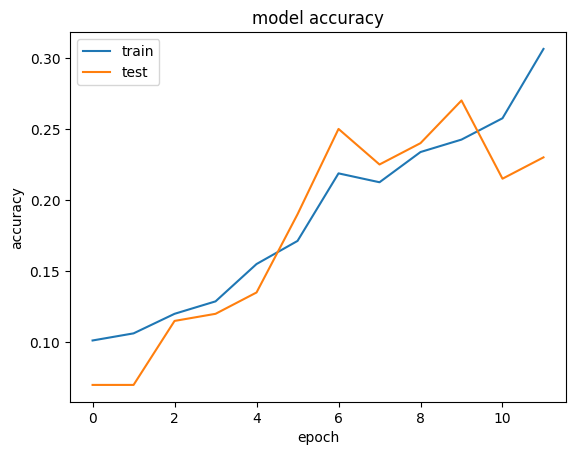

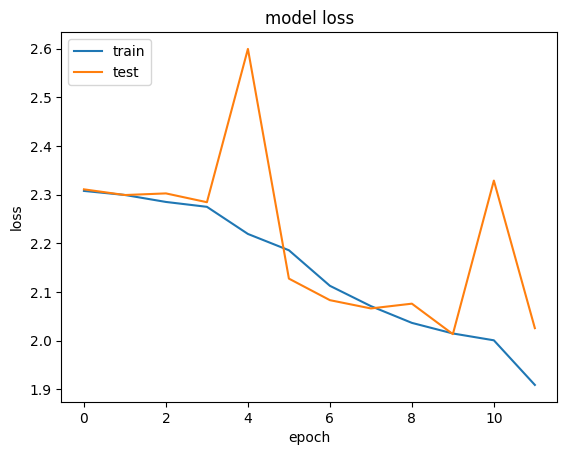

In [133]:
import matplotlib as plt
import keras
from matplotlib import pyplot as plt




plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()